# Customer Segmentation using K-Means and PCA

## Introduction

The clustering model uses basic customer information to group customers with the intent of aiding business operations in various departments. For instance, the marketing department team can use the grouped data to undertake targeted marketing promotions whereas the products team can utilize the information to develop products for specific segments.

Generally, segmenting customers is important to any business as it provides a better understanding of the customers.

## Data Specifications 

1. ID: Shows a unique identification of a customer.

2. Sex: The customer's gender where;
    
    0 : male
        
    1 : female.

3. Marital status: Customer's relationship status where;
    
    0 : single 
        
    1 : non-single (divorced / separated / married / widowed)

4. Age: The current customer's age. 

5. Education: Education level of the customer.

    0: other / unknown

    1: high school

    2: university

    3: graduate school

6. Income: Annual income of the customer (in USD) .

7. Occupation: The employment status of the customer.

    0: unemployed/unskilled

    1: skilled employee / official

    2: management / self-employed / highly qualified employee / officer

8 Settlement size: The size of the city that the customer lives in.

    0: small city

    1: mid-sized city

    2: big city

## Importing Libraries

In [1]:
# Data Analysis and Manipulation

import pandas as pd 
import numpy as np

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # styling 


# Data Standardization 

from sklearn.preprocessing import StandardScaler

# Data Modeling with K-Means and PCA

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Loading Data

In [3]:
# Importing data and setting the first column as the index

df = pd.read_csv('C:/Data Science Projects/Projects/Customer segmentation/Project1/segmentation data.csv', index_col = 0)

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Data Overview

In [4]:
# Getting an overview of the data i.e. column names, data types, and null entries.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


**From the results above;**

- There are 7 variables all represented as numerical values (integer). 

- There are no missing values and the total number of records is 2000.

In [5]:
# Checking for duplicated data

df.duplicated().sum()

0

**Confirmed no duplicates in the data.**

## Descriptive Statistics

In [6]:
# Descriptives of the data

df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**From the table above, we note that;**

- Though all the variables are represented in numerical format, there are only two continous variables i.e. Age and Income.

- The other variables are categorical (ordinal) data.

### Summarizing continuous data

#### Age

- The customer's ages range from `18 years` to `76 years` with an average of approximately `36 years`. 

- Most customers range between `27 years` and `42 years`.

#### Income

- The annual income of the customers range from `USD 35,832` to `USD 309,364`, with an average of `USD 120,954`.

- Majority of customers have income between `USD 97,633` to `USD 138,072`

### Summarizing categorical data

In [7]:
# Checking descriptives for categorical data

df_cat = ['Sex','Marital status','Education','Occupation','Settlement size']

for cat in df_cat:
    
    print(df.groupby(cat).size().sort_values(ascending = False), '\n')

Sex
0    1086
1     914
dtype: int64 

Marital status
0    1007
1     993
dtype: int64 

Education
1    1386
2     291
0     287
3      36
dtype: int64 

Occupation
1    1113
0     633
2     254
dtype: int64 

Settlement size
0    989
1    544
2    467
dtype: int64 



**From the summaries, we note that;**

- Female customers are slightly more than male i.e. `1,086` female vs `914` male customers.

- Single customers are more than those who are non-single i.e. `1,007` single vs `993` non-single customers.

- Majority of the customers high school leavers (`1,386`), followed by those who have attended university (`291`), then those with unknown level of education (`287`), and lastly, those who have attended graduate school (`36`).

- Many customers are skilled employees (`1,113`), followed by unemployed/unskilled (`633`), and finally, high qualified/self employed (`254`).

- Most customers reside in small cities (`989`), followed by those leaving in mid-sized cities (`544`), and lastly, those in big cities (`467`).

## Correlation

In [8]:
# In Pandas, the default correlation method is Pearson's correlation. 
# Let's compute the Pearson's correlation for the variables in the dataset.

df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


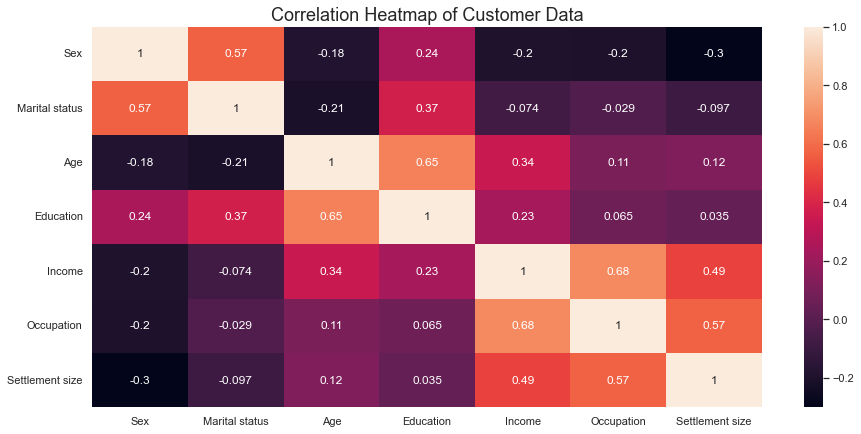

In [9]:
# We can explore the correlation better using a heatmap

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap of Customer Data', fontsize=18)
plt.yticks(rotation=0)
plt.show()


**From the correlations heatmap above;**

- Various features have moderate correlation (r = 0.5 - 0.7).

    - such as Marital status and Sex (r = 0.57).
    - Age and Education (r = 0.65).
    - Income and Occupation (r = 0.68).
    - Occupation and Settlement size (0.57). 
    
- The other variables have a low correlation (r = 0.01 - 0.5).  

### Visualizing the Moderately Correlated Variables

<AxesSubplot:xlabel='Marital status'>

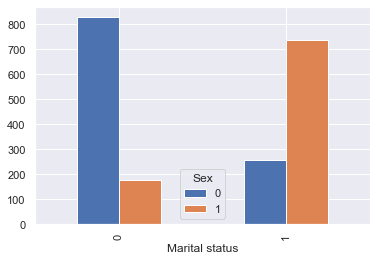

In [10]:
# Bar graph of marital status and sex variables

marStaS = pd.crosstab(index = df['Marital status'],columns = df['Sex'])

marStaS.plot.bar()

**From bar graph above, we can note that;**

- single men (`> 800`) are more than single females (`< 200`).

- Non-single men (`< 300`) are less than non-single females (`> 700`).

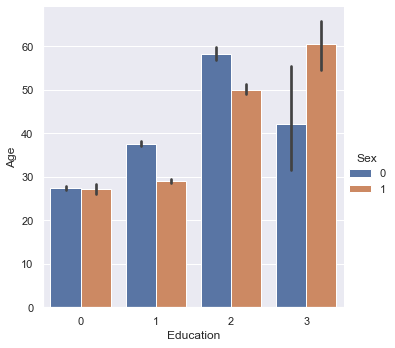

In [21]:
# Bar graph of education versus age grouped by sex 

sns.catplot(x="Education", y="Age", hue="Sex", kind="bar", data=df)

**From chart above, we can deduce that;**

- The average age for customers with unknown education level is `< 30 years` for both females and males. 

- The average age for male customers with high school education level is between `35 - 40 years` while for females is slightly `< 30 years`. 

- The average age for customers with university education level is slightly `< 60 years` for males and `nearly 50 years` for females. 

- The customers with graduate education level have an average age of slightly `> 40 years` for males and `approximately 60 years` for females.

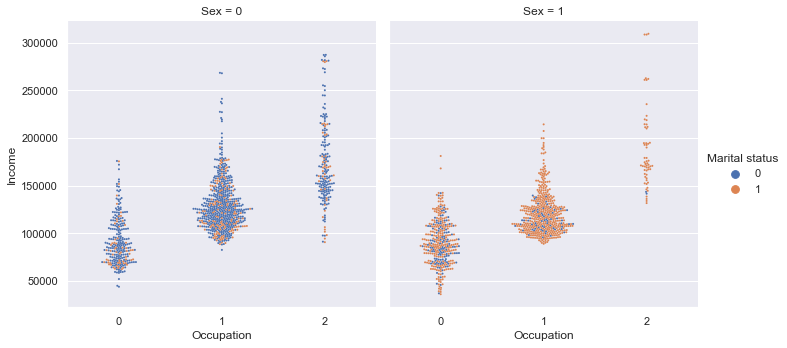

In [95]:
# Chart for Occupation against Income distributed by Marial Status and grouped by Sex

sns.catplot(x="Occupation", y="Income", hue="Marital status", 
            col="Sex", kind = 'swarm', data=df, s = 2)

**From the graph above, we note that;**

- Generally, the distribution of female customer's income based on their occupation is similar to the male customers.

- There are more single men than non-single men in the different occupations.

- There are more non-single female than single females in the different occupations.

- For both male and female customers, majority are skilled employees.

- There are more unemployed/unkilled females than males.

- There are fewer highly qualified /self employed males than females.

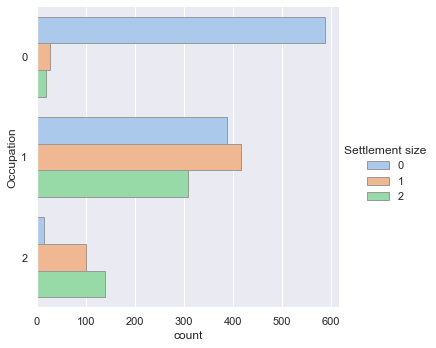

In [24]:
# Chart for Occupation count grouped by Settlement size

sns.catplot(y="Occupation", hue="Settlement size", kind="count", palette="pastel", edgecolor=".6", data=df)

**The graph above provides the following insights;**

#### unemployed/unskilled customers

- Most of these customers (`slightly <600`) live in small cities. 

- Few of these customers(`< 50`) live in medium or big cities.

#### Skilled employees

- Those living in small cities are `slightly < 400`.

- Those living in medium-sized cities are `slightly > 400`.

- Those living in big cities are `slightly > 300`.

#### Management / self-employed / highly qualified employee / officer

- Those living in small cities are minimal (`< 30`).

- The ones living in medium-sized cities are `approximately 100`.

- Those living in big cities are `almost 150`.

## Standardization

In [12]:
# Standardizing data ensures all features have equal weight eliminating bias.

scaler = StandardScaler()

std_df = scaler.fit_transform(df)

## Clustering using K-means

In [13]:
# We run K-means clustering with a range of clusters (1 to 10 clusters).
# for a loop that runs 10 iterations we use range (1, 11)

# We compute the Within Cluster Sum of Squares for the different number of clusters.

#Then use elbow method to determine the optimal number of clusters to use.

# Also, we run the algortihm at many different starting points - k means plus plus.

# Lastly, we set a random state for reproducibility.

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

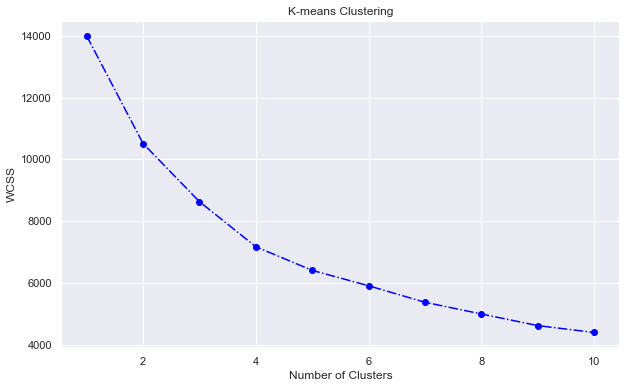

In [14]:
# We plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [15]:
# Using graph above we select 4 clusters as our ideal number and run K-means.

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 100)
kmeans.fit(std_df)

KMeans(n_clusters=4, random_state=100)

In [16]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each customer.

df_segm_kmeans= std_df.copy()
df_segm_kmeans = pd.DataFrame(data = std_df,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,2
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,2


In [17]:
# We can create a new column with segment labels to our table

df_segm_kmeans['K-means Labels'] = df_segm_kmeans['Segment K-means'].map({0:'standard', 
                                                                  1:'fewer opportunities',
                                                                  2:'career-focused', 
                                                                  3:'well-off'})
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,K-means Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,2,career-focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,2,career-focused


In [23]:
# Alternatively we could rename the segment levels instead of creating a new column with labels
# Lets first duplicate the Kmeans dataframe

df_segm_kmeans2= std_df.copy()
df_segm_kmeans2 = pd.DataFrame(data = std_df,columns = df.columns)
df_segm_kmeans2['Segment K-means'] = kmeans.labels_

df_segm_kmeans2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,2
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,2


In [24]:
# change column type to category dtype

df_segm_kmeans2['Segment K-means'] = df_segm_kmeans2['Segment K-means'].astype("category")

# display the column to check if ordered

df_segm_kmeans2['Segment K-means'].head()

0    3
1    0
2    1
3    2
4    2
Name: Segment K-means, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [25]:
# # rename categories according to order ({0:'standard',
#                                          1:'fewer opportunities',
#                                          2:'career-focused', 
#                                          3:'well-off'})

df_segm_kmeans2['Segment K-means'] = df_segm_kmeans2['Segment K-means'].cat.rename_categories(["Standard", 
                                                          "Fewer opportunities", 
                                                          "Career-focused", 
                                                          "Well-off"])

# display data and check the column to confirm proper renaming was done

df_segm_kmeans2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,Well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,Standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,Fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,Career-focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,Career-focused


In [26]:
# We can calculate mean values for the clusters

df_segm_kmeans3 = df_segm_kmeans2.groupby(['Segment K-means']).mean()

df_segm_kmeans3.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
Standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
Fewer opportunities,-0.211965,-0.953978,-0.031298,-0.490245,-0.607667,-0.753072,-0.856323
Career-focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
Well-off,0.093924,0.385797,1.688255,1.819102,0.977831,0.492617,0.451862


### Distribution of the K-means Clusters

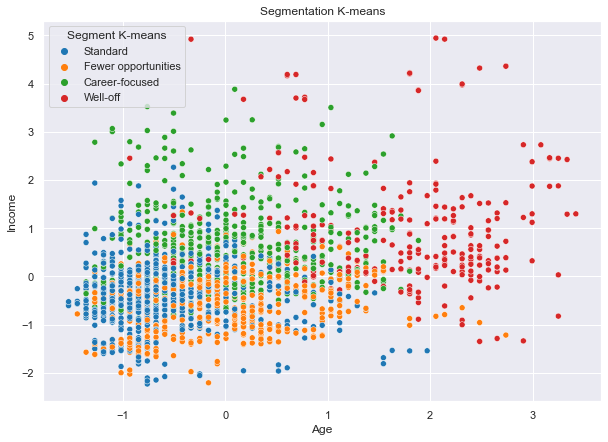

In [27]:
# We use the continuous features (Age and Income) to see the distribution of the customers

# Highlight the customers based on their clusters 


x = df_segm_kmeans2['Age']
y = df_segm_kmeans2['Income']
clusters = df_segm_kmeans2['Segment K-means']

plt.figure(figsize = (10, 7))

sns.scatterplot(x = x, y = y, hue = clusters, palette = 'tab10')

plt.title('Segmentation K-means')
plt.show()

## Principal Component Analysis (PCA)

- To increase interpretability of the chart above, we can use PCA to reduce the dimesionality of the data by finding a smaller set of components which explain the variance in the data.

In [28]:
pca = PCA()

# Use standardized data to Fit PCA.

pca.fit(std_df)

PCA()

In [29]:
# Check how much variance is explained by each of the seven individual components (excluding ID column)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

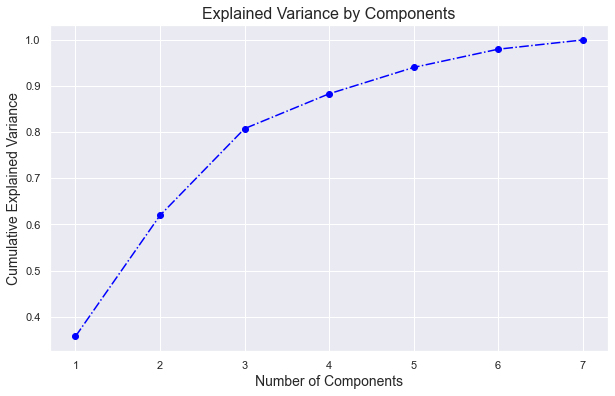

In [30]:
# Here, we plot the cumulative variance explained by total number of components.

plt.figure(figsize = (10,6))

plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='blue')

plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [31]:
# Using the graph above, we choose the subset of components we want to keep. 

# Generally, we keep around 80 % of the explained variance, hence use 3 or 4 components.

# We use 3 components.

pca = PCA(n_components = 3)

pca.fit(std_df)

PCA(n_components=3)

### PCA Results

In [32]:
# Lets explore how the 7 original features are loaded in each component.

# The components attribute displays the loadings of each component based on the 7 features.

# The loadings represent the correlations between the components and the original features. 

pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


### Heat Map for PCA components vs initial features

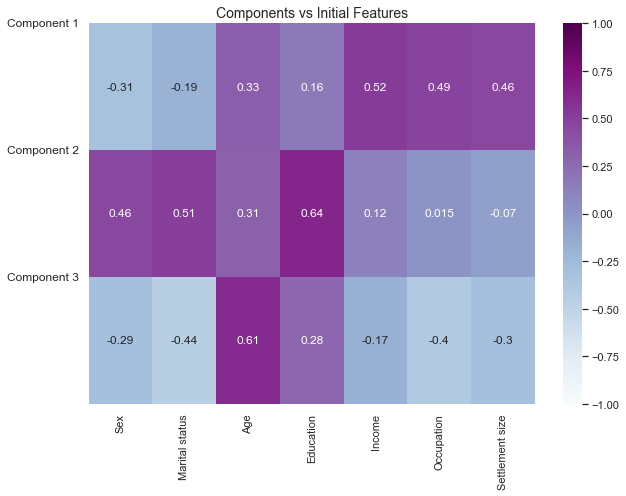

In [34]:
# We can use the Blue - Purple ('BuPu') color scheme and set borders from -1 to 1

plt.figure(figsize=(10,7))

sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'BuPu',
            annot = True)

plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 0,
           fontsize = 12)

plt.title('Components vs Initial Features',fontsize = 14)
plt.show()

## K-means clustering using PCA components

In [35]:
# Transform the standardized data using PCA

trans_pca = pca.transform(std_df)

trans_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [36]:
# We use the transformed data to fit K means.

# We follow previous process to find optimal number of cluster using elbow method.

wcss = []

for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(trans_pca)
    wcss.append(kmeans_pca.inertia_)

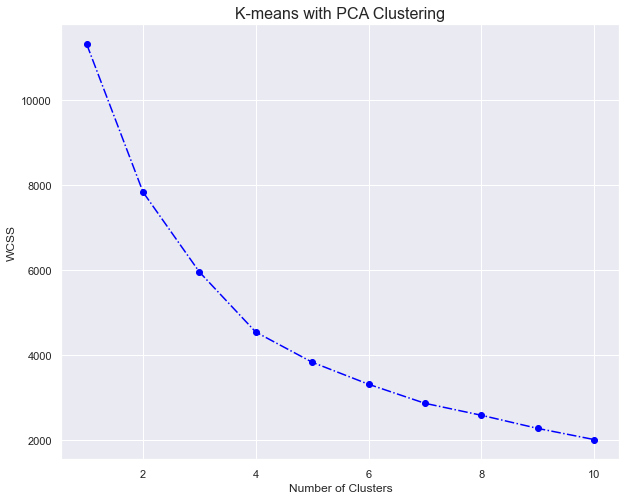

In [37]:
# Plot the Within Cluster Sum of Squares (wcss) for the K-means PCA model.

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [38]:
# From above chart, we choose 4 clusters.

# We run K-means with previous initializer and random state.

kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 100)

# We fit our data with the k-means pca model

kmeans_pca.fit(trans_pca)

KMeans(n_clusters=4, random_state=100)

In [39]:
# We create a new data frame with the original features and add the PCA components (scores).

df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(trans_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [40]:
# Adding a column that contains the pca k-means clusters.

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [41]:
# We can calculate the means for each cluster.

df_segm_pca_kmeans_mean = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [42]:
# We can calculate the size of each cluster and its proportion.

df_segm_pca_kmeans_mean['Size'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_mean['Proportion (%)'] = (df_segm_pca_kmeans_mean['Size'] / df_segm_pca_kmeans_mean['Size'].sum())*100
df_segm_pca_kmeans_mean


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Size,Proportion (%)
Segment K-means PCA,,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,23.00
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,34.60
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,13.25
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,29.15


In [43]:
# We can rename the 4 clusters

df_segm_pca_kmeans_mean = df_segm_pca_kmeans_mean.rename({0:"Fewer opportunities", 
                                                          1:"Standard", 
                                                          2:"Well-off", 
                                                          3:"Career-focused"})
df_segm_pca_kmeans_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Size,Proportion (%)
Segment K-means PCA,,,,,,,,,,,,
Fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,23.00
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,34.60
Well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,13.25
Career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,29.15


### Distribution of the K-means using PCA components Clusters

In [44]:
# First, we map the cluster labels 

df_segm_pca_kmeans['Cluster labels'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:"Fewer opportunities", 
                                                                              1:"Standard", 
                                                                              2:"Well-off", 
                                                                              3:"Career-focused"})
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Cluster labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2,Well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,Fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,Career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,Career-focused


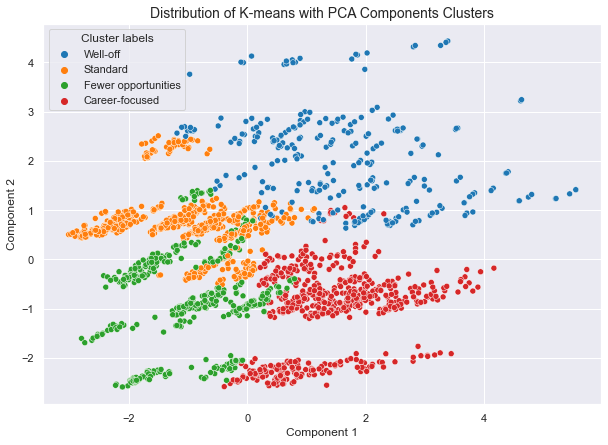

In [45]:
# Then , we plot chart using the PCA components. 

# Here, we will use component 1 and component 2

x = df_segm_pca_kmeans['Component 1']
y = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 7))

sns.scatterplot(x = x, y = y, hue = df_segm_pca_kmeans['Cluster labels'], palette = 'tab10')

plt.title('Distribution of K-means with PCA Components Clusters',fontsize=14)
plt.show()

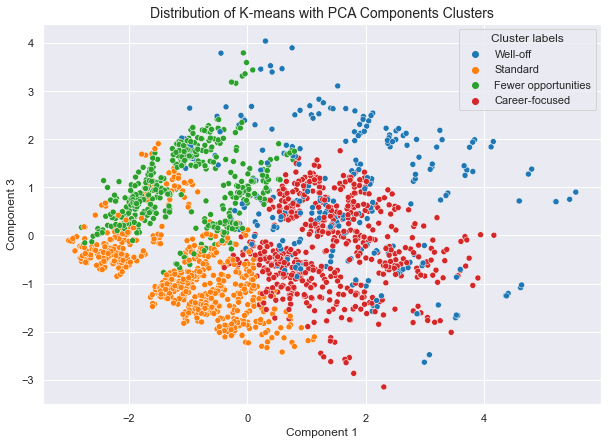

In [46]:
# Using component 1 and component 3

x = df_segm_pca_kmeans['Component 1']
y = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 7))

sns.scatterplot(x = x, y = y, hue = df_segm_pca_kmeans['Cluster labels'], palette = 'tab10')

plt.title('Distribution of K-means with PCA Components Clusters',fontsize=14)
plt.show()

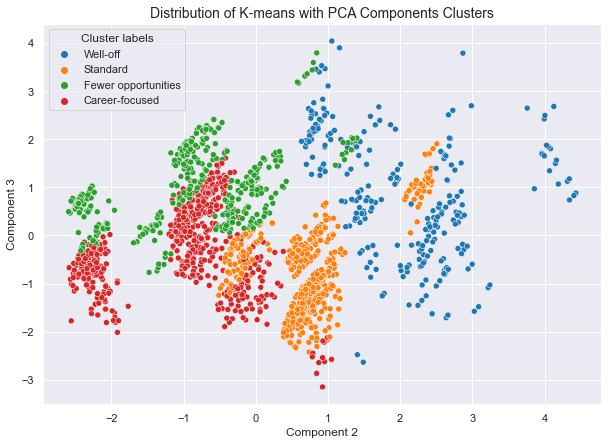

In [47]:
# Using component 2 and component 3

x = df_segm_pca_kmeans['Component 2']
y = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 7))

sns.scatterplot(x = x, y = y, hue = df_segm_pca_kmeans['Cluster labels'], palette = 'tab10')

plt.title('Distribution of K-means with PCA Components Clusters',fontsize=14)
plt.show()

From the 3 charts above, there is better distribution of the clusters using components 1 & 2 and 2 & 3. Using components 1 & 3, much overlapping of the clusters is observed. 

Generally, the K-means with PCA clustering technique generated better clusters as opposed to using K-means clustering. 